In [155]:
import pandas as pd  # For handling datasets
import numpy as np   # For numerical computations
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns            # For creating advanced visualizations
from sklearn.preprocessing import LabelEncoder, StandardScaler  # For encoding and scaling
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.ensemble import RandomForestRegressor    # Example regression model
from sklearn.linear_model import LinearRegression     # Another regression option
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score  # For evaluating model performance
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV


Import dataset

In [107]:
df=pd.read_csv("car.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


EDA

In [108]:
df.info()       #No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [109]:
df.drop(['Car_Name'], axis=1, inplace=True)

In [110]:
df.drop(['Seller_Type'], axis=1, inplace=True)

In [111]:
df          #new dataframe

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Manual,0
1,2013,4.75,9.54,43000,Diesel,Manual,0
2,2017,7.25,9.85,6900,Petrol,Manual,0
3,2011,2.85,4.15,5200,Petrol,Manual,0
4,2014,4.60,6.87,42450,Diesel,Manual,0
...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Manual,0
297,2015,4.00,5.90,60000,Petrol,Manual,0
298,2009,3.35,11.00,87934,Petrol,Manual,0
299,2017,11.50,12.50,9000,Diesel,Manual,0


In [112]:
df.Year.apply = 2025 - df.Year
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Manual,0
1,2013,4.75,9.54,43000,Diesel,Manual,0
2,2017,7.25,9.85,6900,Petrol,Manual,0
3,2011,2.85,4.15,5200,Petrol,Manual,0
4,2014,4.60,6.87,42450,Diesel,Manual,0


In [113]:
df.Fuel_Type.unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [123]:
df.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

Petrol=0 and Diesel=1  
CNG=2

In [114]:
df['Fuel_Type'] = df['Fuel_Type'].map({'Petrol': 0, 'Diesel': 1, 'CNG': 2})
print(df['Fuel_Type'].head())

0    0
1    1
2    0
3    0
4    1
Name: Fuel_Type, dtype: int64


Manual=0 and Automatic=1

In [124]:
df['Transmission'] = df['Transmission'].map({'Manual': 0, 'Automatic': 1})
print(df['Transmission'].head())

0    0
1    0
2    0
3    0
4    0
Name: Transmission, dtype: int64


Split data into independent and dependent datasets

In [125]:
x=df.drop(['Selling_Price'],axis=1)
x.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0
1,2013,9.54,43000,1,0,0
2,2017,9.85,6900,0,0,0
3,2011,4.15,5200,0,0,0
4,2014,6.87,42450,1,0,0


In [126]:
y=df['Selling_Price']
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

Train-test-split

In [127]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [128]:
print(x_train.shape)
print(x_test.shape)

(240, 6)
(61, 6)


In [129]:
x_train.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Transmission,Owner
184,2008,0.750,26000,0,0,1
132,2017,0.950,3500,0,0,0
194,2008,0.787,50000,0,0,0
75,2015,6.800,36000,0,0,0
111,2016,1.500,8700,0,0,0


Model Selection and Training

In [148]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [151]:
models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

In [153]:
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"{name} - MAE: {mae:.2f}, MSE: {mse:.2f}, R2: {r2:.4f}")

LinearRegression - MAE: 1.30, MSE: 3.55, R2: 0.8458
RandomForest - MAE: 0.63, MSE: 0.90, R2: 0.9611
GradientBoosting - MAE: 0.53, MSE: 0.67, R2: 0.9709
XGBoost - MAE: 0.61, MSE: 0.89, R2: 0.9615


Model Selected: XGboost

In [156]:
# Hyperparameter Tuning for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
grid_search = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best XGBoost Parameters:", grid_search.best_params_)

Best XGBoost Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}


In [157]:
# Final Model Evaluation
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)
print(f"Final XGBoost Model - R2 Score: {r2_score(y_test, y_pred):.4f}")

Final XGBoost Model - R2 Score: 0.9567


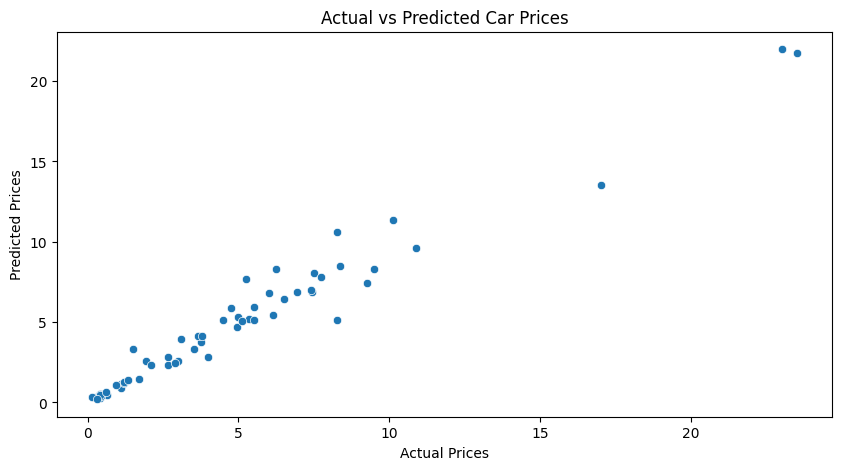

In [158]:
# Plot Actual vs Predicted Prices
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Car Prices")
plt.show()


Conclusion: Model is finally trained with XGboost model with 96% accuracy.
